In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df=df.drop("show_id",axis=1)
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [10]:
#Since date_added should be in int format, we change it to datetime

df["date_added"]=pd.to_datetime(df["date_added"])
#We will create a new column "Year"

df["Year_added"]=df["date_added"].dt.year

In [13]:
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'Year_added'],
      dtype='object')

In [25]:
print("Year added to netflix : ",df["Year_added"].nunique())
print("Year released : ",df["release_year"].nunique())
print("Title : ",df["title"].nunique())
print("Director : ",df["director"].nunique())
print("country : ",df["country"].nunique())
print("Types : ",df["type"].nunique())


Year added to netflix :  14
Year released :  74
Title :  8787
Director :  4528
country :  86
Types :  2


In [16]:
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
Year_added      0
dtype: int64

In [19]:
df.shape

(8790, 10)

In [21]:
df=df.drop_duplicates()

In [22]:
df.shape

(8787, 10)

3 duplicates were present and they were removed successfully

In [26]:
df["type"].value_counts()

type
Movie      6124
TV Show    2663
Name: count, dtype: int64

EDA

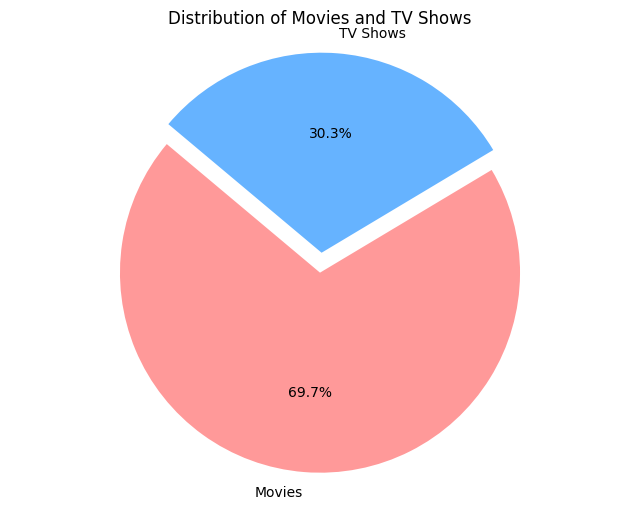

In [33]:
mov=df[df["type"]=="Movie"].shape[0]
tv=df[df["type"]=="TV Show"].shape[0]

tot=mov+tv
pmov=(mov/tot)*100
ptv=(tv/tot)*100

data=[pmov,ptv]
labels=["Movies","TV Shows"]
explode = (0.1, 0)  # Highlight the slice

# Create the graphic
plt.figure(figsize=(8, 6))
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies and TV Shows')
plt.axis('equal')
plt.show()



In [39]:
new=df["director"].value_counts().head(10)
new

director
Not Given                 2587
Rajiv Chilaka               20
Raúl Campos, Jan Suter      18
Alastair Fothergill         18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Name: count, dtype: int64

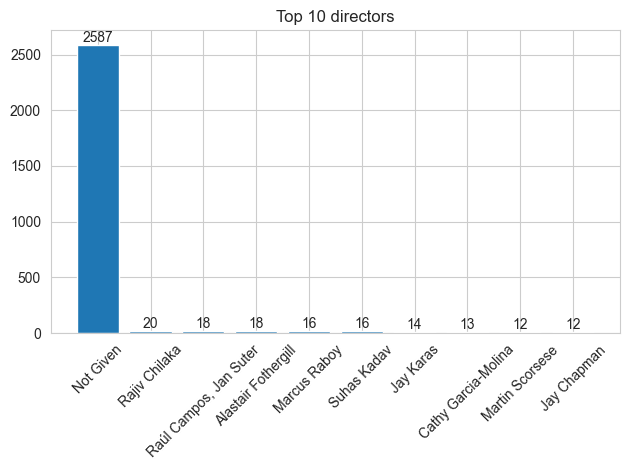

In [46]:
bars=plt.bar(new.index,new.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


plt.title("Top 10 directors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
titles_by_country = df['country'].value_counts()
titles_by_country

country
United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

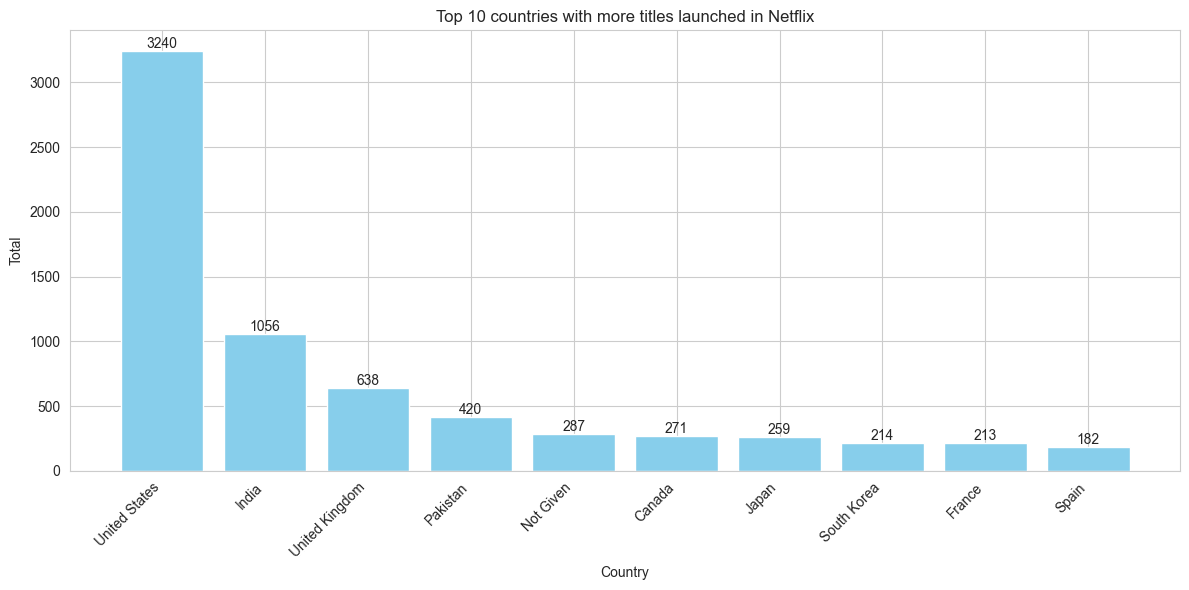

In [43]:


top_10_countries = titles_by_country.nlargest(10)

#Graphic bars
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')

#Labels and headers
plt.title('Top 10 countries with more titles launched in Netflix')

plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')

# Add value over each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()

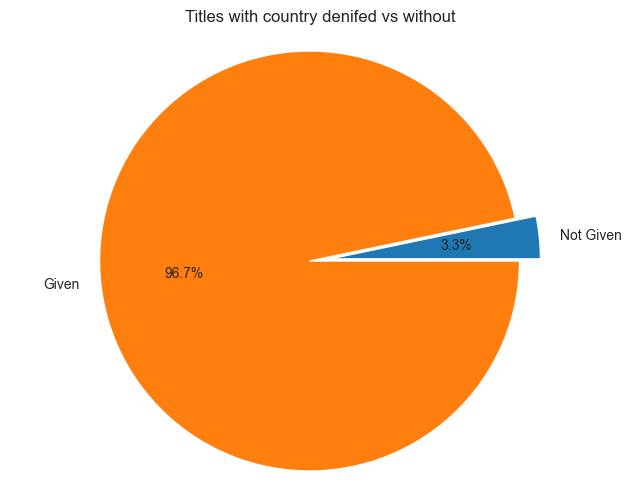

In [57]:
total_not_given = df[df['country'] == 'Not Given'].shape[0]
total_given = df[df['country'] != 'Not Given'].shape[0]

# Percentages
total = total_not_given + total_given
percentage_not_given = (total_not_given / total) * 100
percentage_given = (total_given / total) * 100

# Tags and values
labels = ['Not Given', 'Given']
sizes = [percentage_not_given, percentage_given]
explode = (0.1, 0)  # Highlight the slice

#Create the graphic
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Titles with country denifed vs without')
plt.axis('equal')
plt.show()


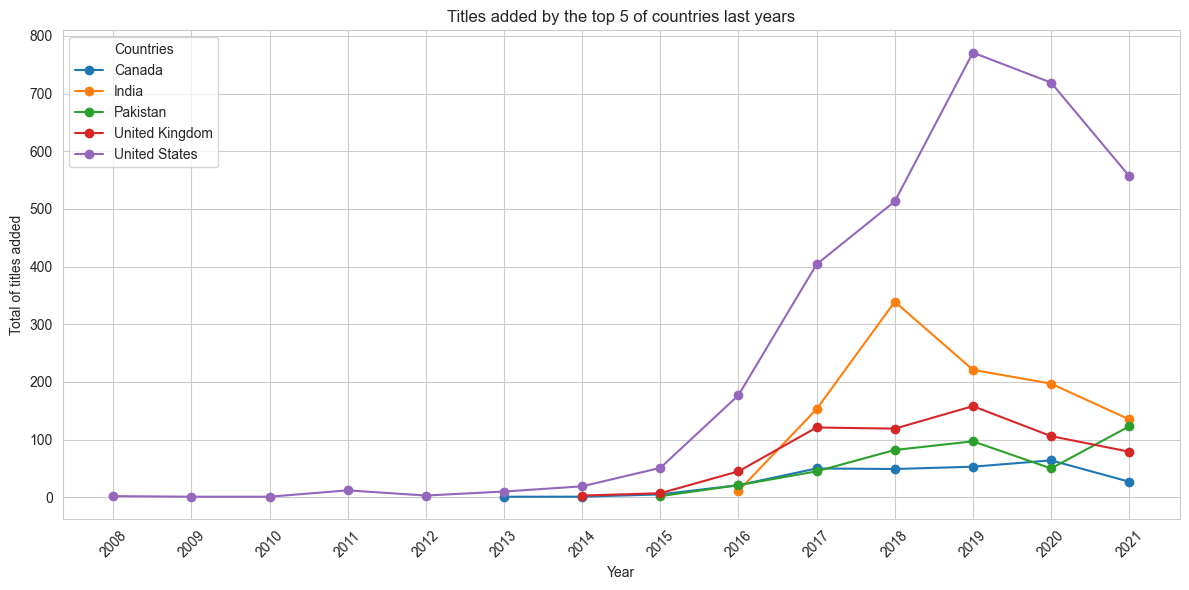

In [61]:
top_countries = df[df['country'] != 'Not Given']['country'].value_counts().head(5).index
#Sort by country
df_top_countries = df[df['country'].isin(top_countries)]
#Create the graphic
titles_by_year_country = df_top_countries.groupby(['Year_added', 'country']).size().unstack()
plt.figure(figsize=(12, 6))
for country in titles_by_year_country.columns:
    plt.plot(titles_by_year_country.index, titles_by_year_country[country], marker='o', label=country)

# Add tags and header
plt.title('Titles added by the top 5 of countries last years')
plt.xlabel('Year')
plt.ylabel('Total of titles added')
plt.legend(title='Countries')

# Show the graphic
plt.grid(True)
plt.xticks(titles_by_year_country.index, rotation=45)
plt.tight_layout()
plt.show()

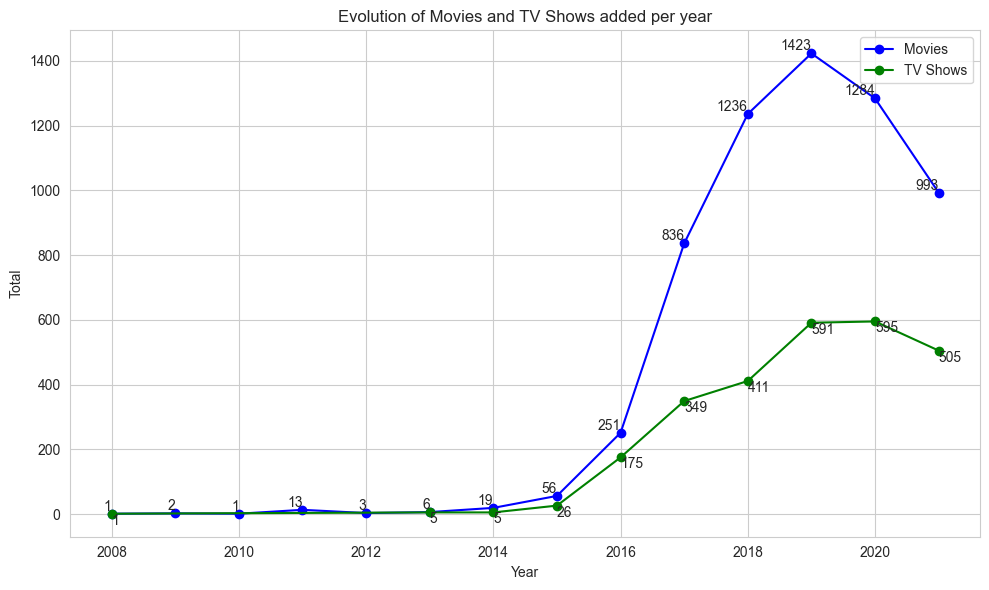

In [56]:
df_movies = df[df['type'] == 'Movie'].groupby('Year_added').size()
df_tv_shows = df[df['type'] == 'TV Show'].groupby('Year_added').size()

plt.figure(figsize=(10, 6))
plt.plot(df_movies.index, df_movies.values, marker='o', label='Movies', color='blue')
plt.plot(df_tv_shows.index, df_tv_shows.values, marker='o', label='TV Shows', color='green')

# Pinpoint values
for x, y in zip(df_movies.index, df_movies.values):
    plt.text(x, y, str(y), ha='right', va='bottom')

for x, y in zip(df_tv_shows.index, df_tv_shows.values):
    plt.text(x, y, str(y), ha='left', va='top')

    
plt.title('Evolution of Movies and TV Shows added per year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()


plt.grid(True)
plt.tight_layout()

plt.show()